# Regression
Machine Learning Regression is a technique for investigating the relationship between independent variables or features and a dependent variable or outcome. It's used as a method for predictive modelling in machine learning, in which an algorithm is used to predict continuous outcomes.

# Multi Linear Regression

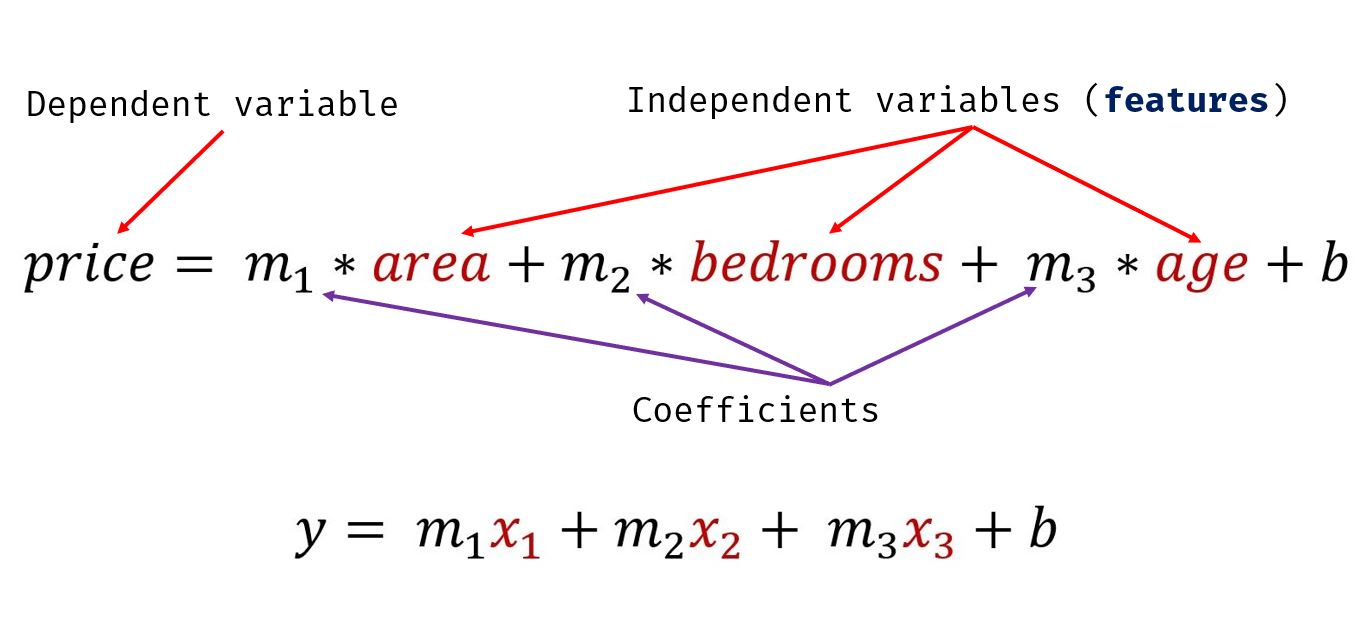

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('/content/homeprices_mlr.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [35]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())


In [36]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [37]:
from sklearn import linear_model

In [38]:
reg = linear_model.LinearRegression()

In [39]:
reg.fit(df.drop('price', axis='columns'), df.price)

LinearRegression()

In [40]:
reg.predict([[3000, 3, 40]]) # 498408.25158031]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

# ============================================

In [ ]:
# checking

In [41]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

In [42]:
y = (3000*112.06244194+3*23388.88007794+40*-3231.71790863)+221323.00186540396
y

498408.251574024

# =================================================

In [ ]:
#In exercise folder (same level as this notebook on github) there is hiring.csv.
#This file contains hiring statics for a firm such as experience of candidate, his written test score
#and personal interview score. Based on these 3 factors, HR will decide the salary.
#Given this data, you need to build a machine learning model for HR department that can help them
#decide salaries for future candidates. Using this predict salaries for following candidates,

#2 yr experience, 9 test score, 6 interview score
#12 yr experience, 10 test score, 10 interview score

In [43]:
data = pd.read_csv('/content/hiring.csv')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [49]:
mapping_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eleven':11}
data['experience'] = data['experience'].map(mapping_dict)

In [50]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,NaN,NaN,7,72000
7,11.0,7.0,8,80000


In [51]:
data.experience = data.experience.fillna(data.experience.median())
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,5.0,8.0,9,50000
1,5.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,5.0,NaN,7,72000
7,11.0,7.0,8,80000


In [58]:
import math
median_test_score = math.floor(data['test_score(out of 10)'].mean())
median_test_score

7

In [59]:
data['test_score(out of 10)'] = data['test_score(out of 10)'].fillna(median_test_score)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,5.0,8.0,9,50000
1,5.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,5.0,7.0,7,72000
7,11.0,7.0,8,80000


In [60]:
reg = linear_model.LinearRegression()
reg.fit(data[['experience','test_score(out of 10)','interview_score(out of 10)']],data['salary($)'])

LinearRegression()

In [61]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50012.76537957])

In [62]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([87631.4788828])